# ChessLens VIDEO

## Dependencies

In [1]:
import sys
sys.path.append('./utils')

import os

In [3]:
import cv2
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

In [4]:
# Global variables for mouse click
# ================== MOUSE diye click kore video theke coordinate fix korbo ===================================================
src_pts = []

board_state = [
    "r","n","b","q","k","b","n","r",
    "p"*8,
    " "*8,
    " "*8,
    " "*8,
    " "*8,
    "P"*8,
    "R","N","B","K","Q","B","N","R"
]

od = [
    1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,
    1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1
]

## HOMOGRAPHY

In [5]:
# ===================== SELECTS POINTS using MOUSE ==============================
def select_point(event, x, y, flags, param):
    global src_pts
    if event == cv2.EVENT_LBUTTONDOWN:
        src_pts.append((x, y))
        print(f"Point selected: {x}, {y}")

# =================== COMPUTES HOMOGRAPHY =========================================================
def compute_homography(src_pts):
    # Destination points to warp into (800x800 board)
    dst_pts = np.array([
        [0, 0],
        [800, 0],
        [800, 800],
        [0, 800]
    ], dtype="float32")

    src_pts_np = np.array(src_pts, dtype="float32")
    H, _ = cv2.findHomography(src_pts_np, dst_pts)
    return H

## Camera INIT Setup

In [6]:
# Open webcam

# ==================== INITIAL SETUP with camera ================================

# cap = cv2.VideoCapture(0)
# cam_url = 'http://192.168.43.239:8080/video'
# cam_url = 'http://192.168.210.142:8080/video'
# cam_url = 'http://172.20.252.36:8080/video' # Bhaskara-Darpan

cam_url = 'http://192.168.96.16:8080/video'

# cam_url = 'http://192.168.1.195:8080/video'
cap = cv2.VideoCapture(cam_url)
cv2.namedWindow("Initial Frame")
cv2.setMouseCallback("Initial Frame", select_point)

# Wait for 4 points to be selected

print("Select 4 points on the chessboard: Top-Left → Top-Right → Bottom-Right → Bottom-Left")
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Show selected points
    for pt in src_pts:
        cv2.circle(frame, pt, 5, (0, 255, 0), -1)

    cv2.imshow("Initial Frame", frame)
    if len(src_pts) == 4:
        print("4 points selected, computing homography...")
        break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        exit()

H = compute_homography(src_pts)
cv2.destroyWindow("Initial Frame")

Select 4 points on the chessboard: Top-Left → Top-Right → Bottom-Right → Bottom-Left
Point selected: 762, 860
Point selected: 787, 170
Point selected: 1462, 150


[mjpeg @ 0x44ad3040] overread 8


Point selected: 1580, 847
4 points selected, computing homography...


## Real-time MONITORING

In [7]:
# ====================== BOX EXTRACTION ============================================================
def extract_squares(warped_img):
    squares = []
    square_size = warped_img.shape[0] // 8  # Assuming square board

    for i in range(8):
        row = []
        for j in range(8):
            x1 = j * square_size
            y1 = i * square_size
            x2 = (j + 1) * square_size
            y2 = (i + 1) * square_size
            square = warped_img[y1:y2, x1:x2]
            row.append(square)
        squares.append(row)
    return squares

In [8]:
# Warp initial frame to get the initial board

# =============== REAL-TIME MONITORING ========================
_, init_frame = cap.read()
init_warped = cv2.warpPerspective(init_frame, H, (800, 800))
init_gray = cv2.cvtColor(init_warped, cv2.COLOR_BGR2GRAY)
cv2.imwrite("initial_frame.jpg", init_warped)
previous_squares = extract_squares(init_gray)

In [ ]:
print("Starting real-time monitoring... Press 'q' to quit.")

# %run frontend.ipynb

while True:
    ret, frame = cap.read()
    if not ret:
        break

    warped = cv2.warpPerspective(frame, H, (800, 800))
    
    if cv2.waitKey(1) & 0xFF == ord('c'): # MOVE happened
        cv2.imwrite("current_frame.jpg", warped)

        # # Draw detected squares
        # square_size = 800 // 8
        # x1_from = move_from[1] * square_size
        # y1_from = move_from[0] * square_size
        # x1_to = move_to[1] * square_size
        # y1_to = move_to[0] * square_size
    
        # cv2.rectangle(warped, (x1_from, y1_from), (x1_from+square_size, y1_from+square_size), (0,0,255), 3)
        # cv2.rectangle(warped, (x1_to, y1_to), (x1_to+square_size, y1_to+square_size), (0,255,0), 3)

    cv2.imshow("Warped Chessboard", warped)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.imwrite("game_over.jpg", warped)
        break



cap.release()
cv2.destroyAllWindows()

Starting real-time monitoring... Press 'q' to quit.


[mjpeg @ 0x44ad3040] overread 8


Starting real-time monitoring... Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
[[0.99994385]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.999981]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.999732]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.9998879]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.9999633]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.9999604]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[2.7856757e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1.5769174e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.9999896]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.99998724]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.99991983]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.9998939]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.9998636]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.9998114]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.9446817]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.944814]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.9995117]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.9999015]]
1/1

In [10]:
import matplotlib.pyplot as plt

def show_8x8_squares(square_grid):
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))

    for i in range(8):
        for j in range(8):
            axes[i, j].imshow(square_grid[i][j], cmap='gray')
            cv2.imwrite(f"dataset/box_{i}{j}.jpg",square_grid[i][j])
            axes[i, j].axis('off')  # Hide axis ticks

    plt.tight_layout()
    plt.show()

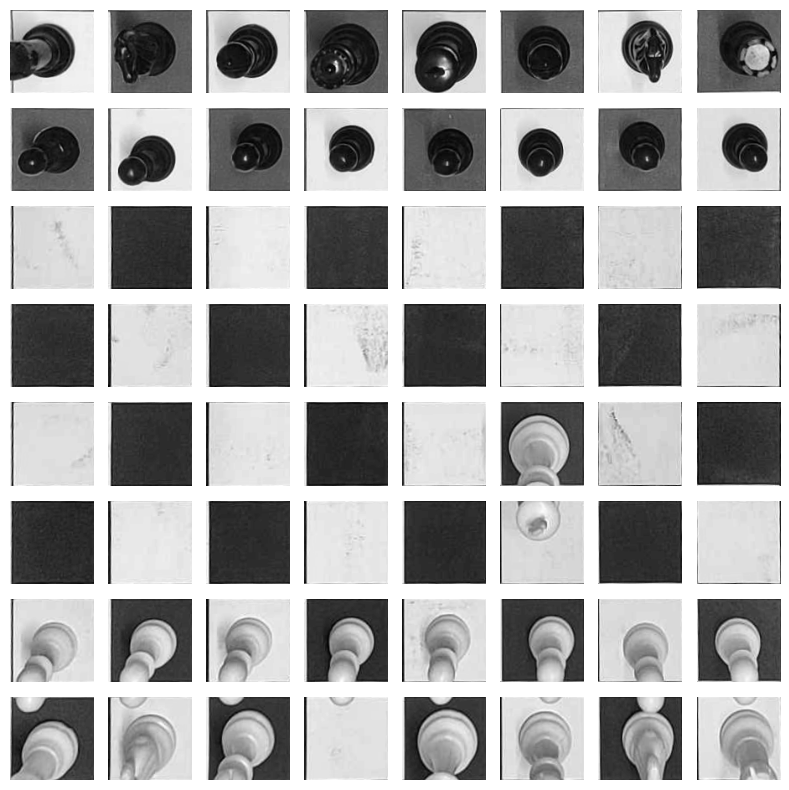

In [21]:
previous_squares = extract_squares(init_gray)
show_8x8_squares(previous_squares)

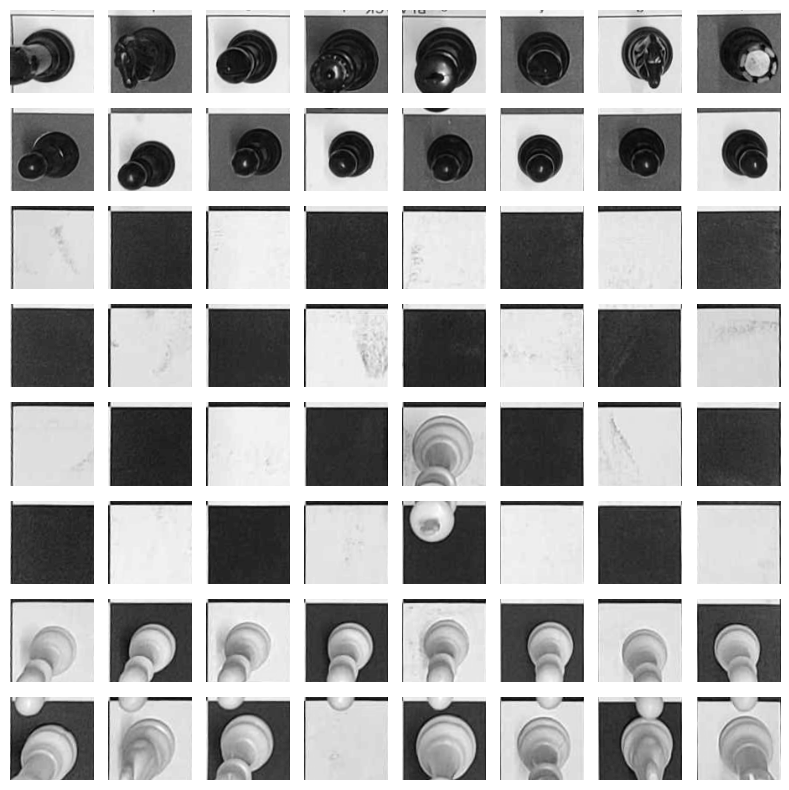

In [11]:
show_8x8_squares(current_squares)

In [51]:
# Compare squares to detect changes
move_from = None
move_to = None
for i in range(8):
    for j in range(8):
        compare = has_changed(previous_squares[i][j], current_squares[i][j])
        print(f"({i},{j})==================================================================")
        # SCORE1 -> Previous square
        # SCORE2 -> Current square
        if (i==4 and j==5) or (i==4 and j==4):
            print(f"Compare value at ({i},{j})",compare)
        if compare!=0:
            if compare==1:
                move_from = (i, j)
                print(f"move_from = ({i}, {j})")
            if compare==-1:
                move_to = (i, j)
                print(f"move_to = ({i}, {j})")
            # move_detected = True

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
[[7.451975e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[8.644876e-06]]
(0,0)==================================================================
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.00031732]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.00027304]]
(0,1)==================================================================
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[6.53126e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[9.082917e-07]]
(0,2)==================================================================
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[5.675449e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[8.609319e-06]]
(0,3)==================================================================
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[2.4430817e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[3.367263e-06]]
(0,4)==================================================================
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[5.432406e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [7]:
import os
folder = "images"

for file in os.listdir(folder):
    prefix = file[0]
    img = cv2.imread(folder+"/"+file, cv2.IMREAD_GRAYSCALE)
    c = extract_squares(img)
    for i in range(8):
        for j in range(8):
            # axes[i, j].imshow(square_grid[i][j], cmap='gray')
            cv2.imwrite(f"dataset/{prefix}_box_{i}{j}.jpg",c[i][j])
            # axes[i, j].axis('off')  # Hide axis ticks